# Avocado Project

Avocado is a fruit consumed by people heavily in the United States.

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

-Date - The date of the observation

-AveragePrice - the average price of a single avocado

-type - conventional or organic

-year - the year

-Region - the city or region of the observation

-Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

import joblib
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df=pd.read_csv('dataset/avocado.csv.zip')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
df.shape

(18249, 14)

In this dataset total number of rows are 18249 and features/columns are 14

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Total 14 data Columns are present

In [6]:
#Lets check the  Datatypes of each column
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Here 8 features are float64 datatypes ,3 columns are object datatype and 2 are integer datatype

### Checking the null value

In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values are present

In [8]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Here are the list of region.

In [9]:
len(df.region.unique())

54

In [10]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)


We have data of four Years

In [11]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

The type of avocado are Conventional and organic.

### statistics summary

In [12]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


this tell us about the mean , median of the different columns and also the min and max values.

Also the differene between the 75% percentile and max is high in some columns that means outliers are present

## Exploratory Data Analysis

### 1. To check the missing values

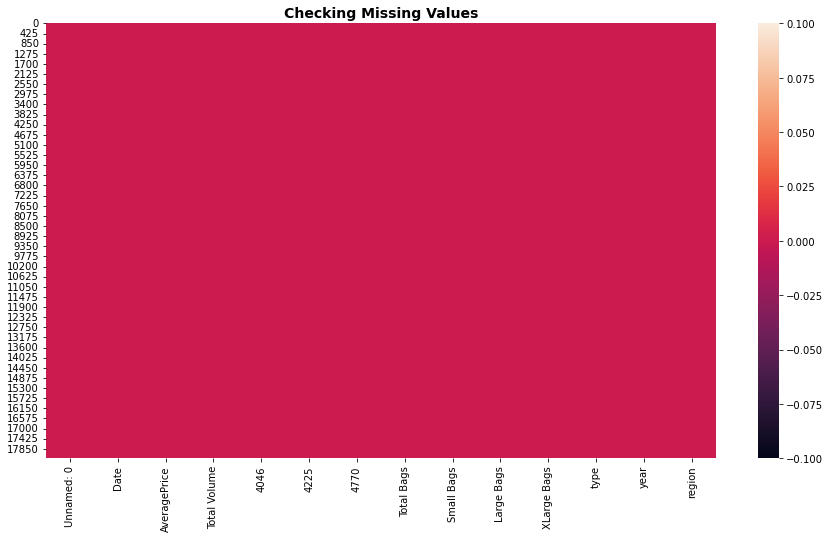

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())
plt.title('Checking Missing Values',fontsize=14,fontweight='bold')
plt.show()

There are no missing / null values present in the dataset

## Checking the correlation

In [14]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


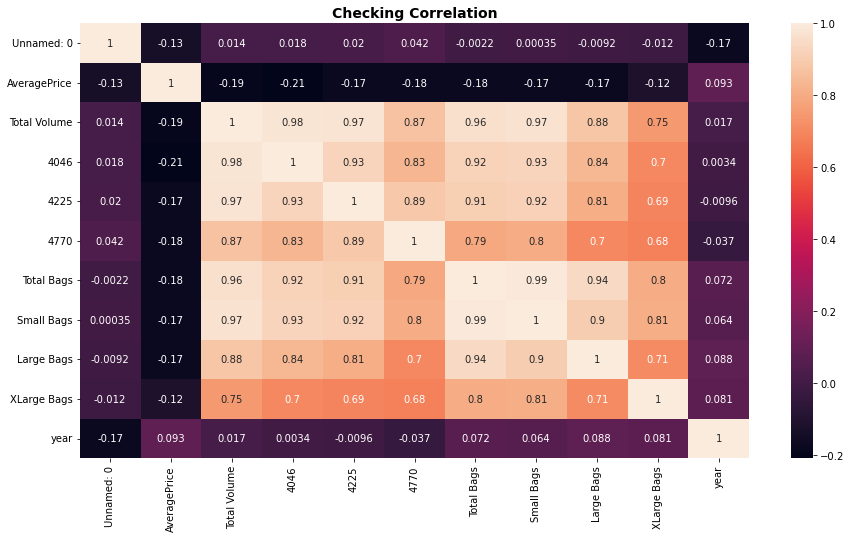

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Checking Correlation',fontsize=14,fontweight='bold')
plt.show()

This shows that Average price is negatively correlated with all feaures except for year

In [16]:
#there is  column Unnamed: 0 in the dataset that we can drop as it does not helps so we drop
df.drop(columns=["Unnamed: 0"],inplace=True)

In [17]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Distribution of type of avocado

conventional    9126
organic         9123
Name: type, dtype: int64


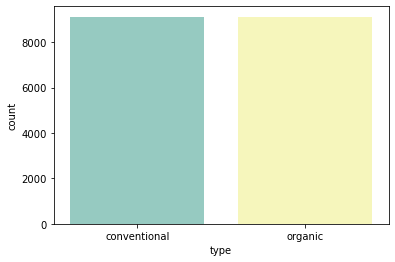

In [18]:
print(df['type'].value_counts())
sns.countplot('type', data=df, palette='Set3')

plt.show()

Here we can see that we have two type of avocado's some are organic and some are conventional

We have two classes which are almost perfectly distributed

## Production By Region:

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

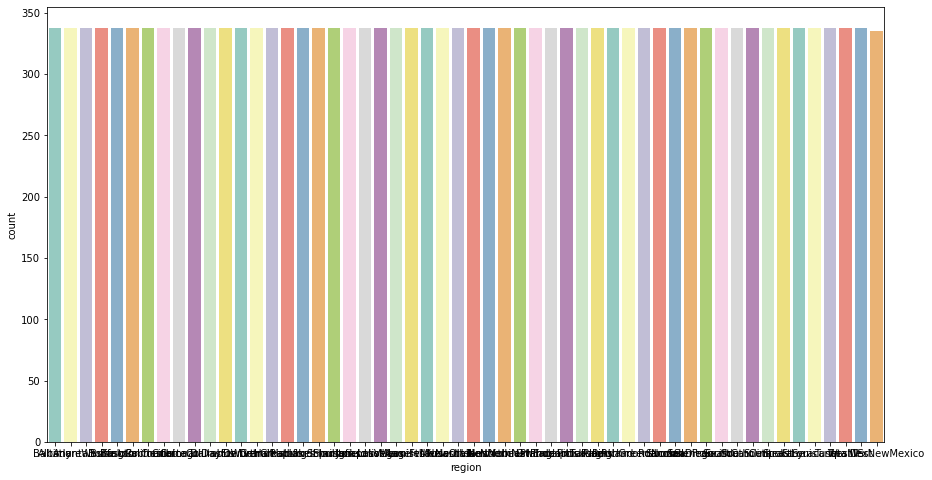

In [19]:
print(df['region'].value_counts())
plt.figure(figsize=(15,8))
print('\n', 'There are:', len(df['region'].unique()), 'unique values in the feature')
sns.countplot('region', data=df, palette='Set3')

plt.show()

The Features have 54 unique values which are perfectly distributed through the dataset.

## Average Price of Avocado According to Region

In [20]:
avg_per_region = df.groupby("region")["AveragePrice"].mean()
df1 = pd.DataFrame(avg_per_region)
df1 = pd.DataFrame(df1.AveragePrice.sort_values(ascending=False))
df1.head()

,AveragePrice
region,
HartfordSpringfield,1.818639
SanFrancisco,1.804201
NewYork,1.727574
Philadelphia,1.632130
Sacramento,1.621568


Text(0.5, 1.0, 'Average Price of Avocado According to Region')

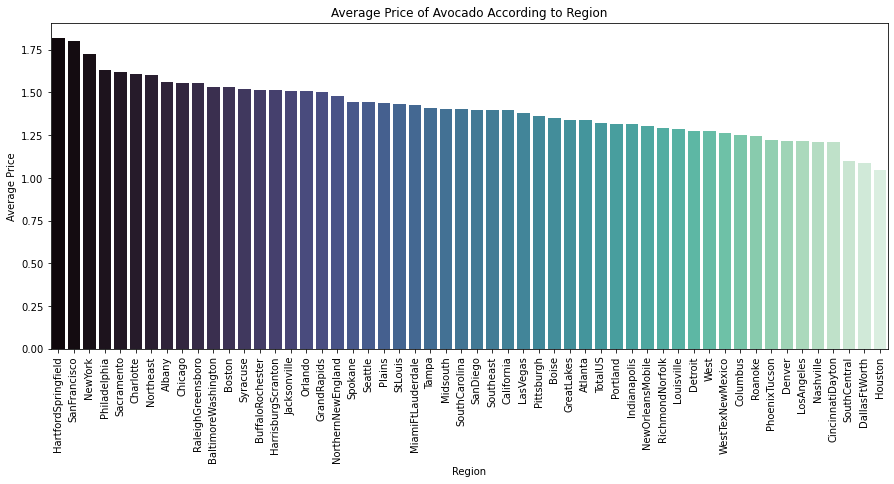

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(x=df1.index, y=df1.AveragePrice, palette="mako")

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Here we can see that the average price of avocado according to region is very high for the HartfordSpringfield, and least for the Hoston

### Average Price of Organic Avocado According to Region

In [22]:
avg_per_region_and_type = df.groupby(["type", "region"])["AveragePrice"].mean()
df2 = pd.DataFrame(avg_per_region_and_type)
df2 = pd.DataFrame(df2.AveragePrice.sort_values(ascending=False))
df2.reset_index(level=0, inplace=True)
df2.head()

,type,AveragePrice
region,,
HartfordSpringfield,organic,2.229231
SanFrancisco,organic,2.211243
NewYork,organic,2.053018
Sacramento,organic,1.969172
Charlotte,organic,1.936982


Text(0.5, 1.0, 'Average Price of Organic Avocado According to Region')

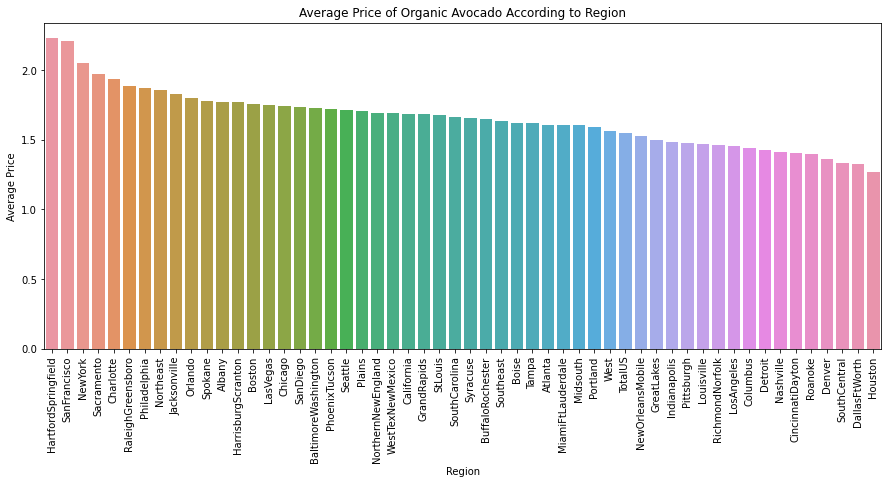

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(x=df2[df2["type"] == "organic"].index, y=df2[df2["type"] == "organic"]["AveragePrice"])
sns.color_palette("rocket")

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Organic Avocado According to Region')

here also can see that the here Average Price of Organic Avocado According to Region is highest for the HartfordSpringfield and SanFranciso city

### Average Price of Conventional Avocado According to Region

Text(0.5, 1.0, 'Average Price of Conventional Avocado According to Region')

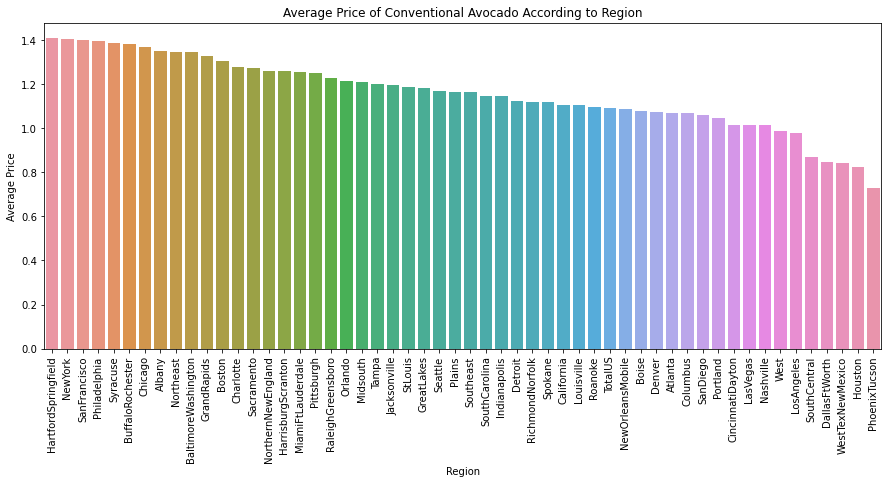

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(x=df2[df2["type"] == "conventional"].index, y=df2[df2["type"] == "conventional"]["AveragePrice"])
sns.color_palette("magma")

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Conventional Avocado According to Region')

from the above graph we can see that the here Average Price of Conventional Avocado According to Region is highest for the HartfordSpringfield and NewYork city

### Observations

from above graphs we can see that the Average price of avocado whether it's Conventional or Organic the average price is high for the city like HartfordSpringfield, SanFranciso and newyork city

## Average Price of Avocado According to Type

Text(0.5, 1.0, 'Average Price of Avocado According to Type')

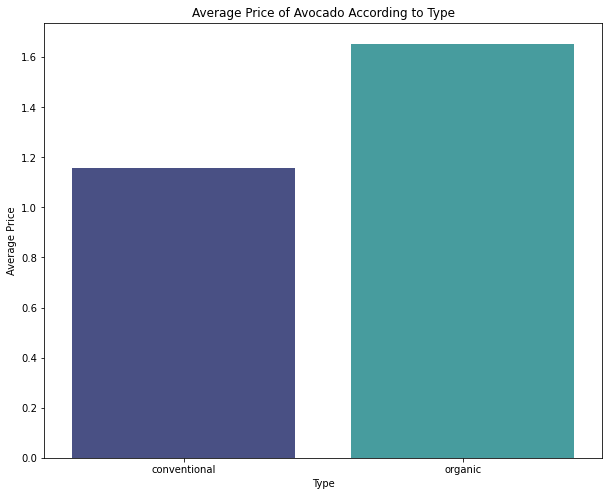

In [25]:
avg_per_type = df.groupby("type")["AveragePrice"].mean()
df2 = pd.DataFrame(avg_per_type)

plt.figure(figsize=(10,8))
sns.barplot(x=df2.index, y=df2.AveragePrice, palette="mako")

plt.xlabel("Type")
plt.ylabel("Average Price")
plt.title("Average Price of Avocado According to Type")

The average price of Organic avocado is higher than the conventional



## Average Price by Type According to Years

Text(0.5, 1.0, 'Average Price by Type According to Years')

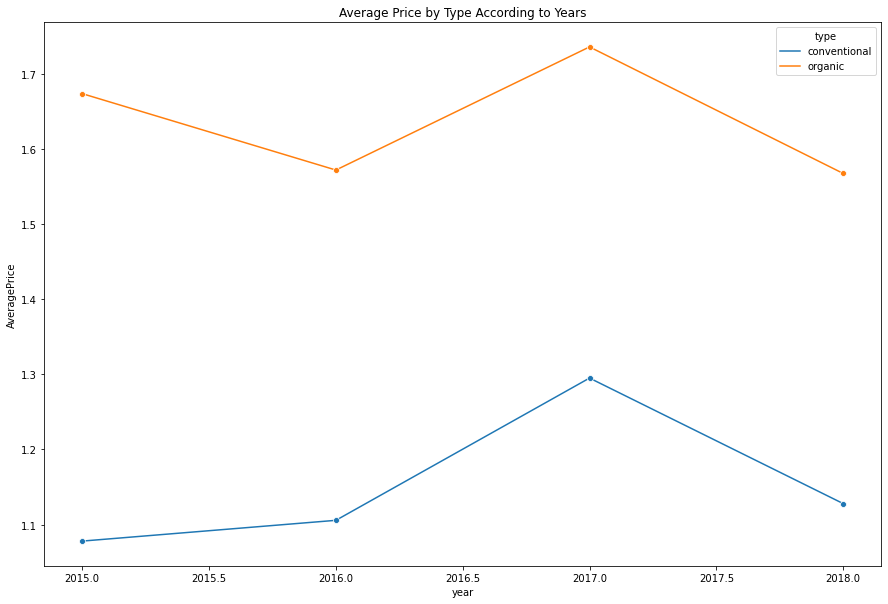

In [26]:
plt.figure(figsize=(15,10))
sns.lineplot(x="year", y="AveragePrice", hue="type", marker='o', ci=None, data=df)
plt.title("Average Price by Type According to Years")

As shown in previous graph the average price of Organic avocado is higher, and we can see here that according to year wise also the price of organic is higher than of conventional. THe point here is :

In year 2015 the average price of conventional avocado is very low
but in mid year of 2016 to 2017 it rapidly increases as the demand of avocado increases for both the organic and the conventional which is then going down as we move to year of 2018

## Average Price by Type According to Months

In [27]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


Text(0.5, 1.0, 'Average Price by Type According to Months')

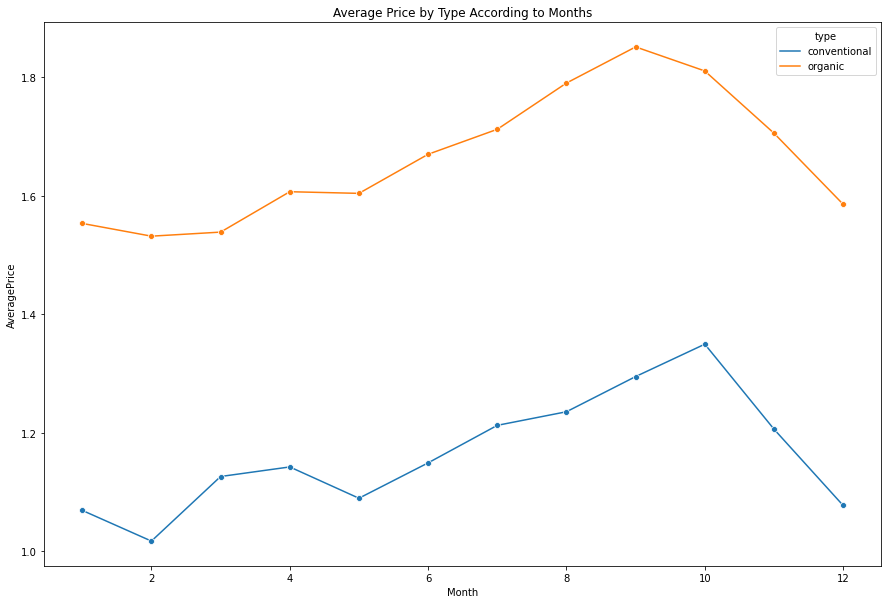

In [28]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Month", y="AveragePrice", hue="type", marker='o', ci=None, data=df)
plt.title("Average Price by Type According to Months")

Here we can see that the for both conventional and the organic avocado the average price increases in the 10 th month and the 11th month which are October and November

## Visualizing the numerical columns

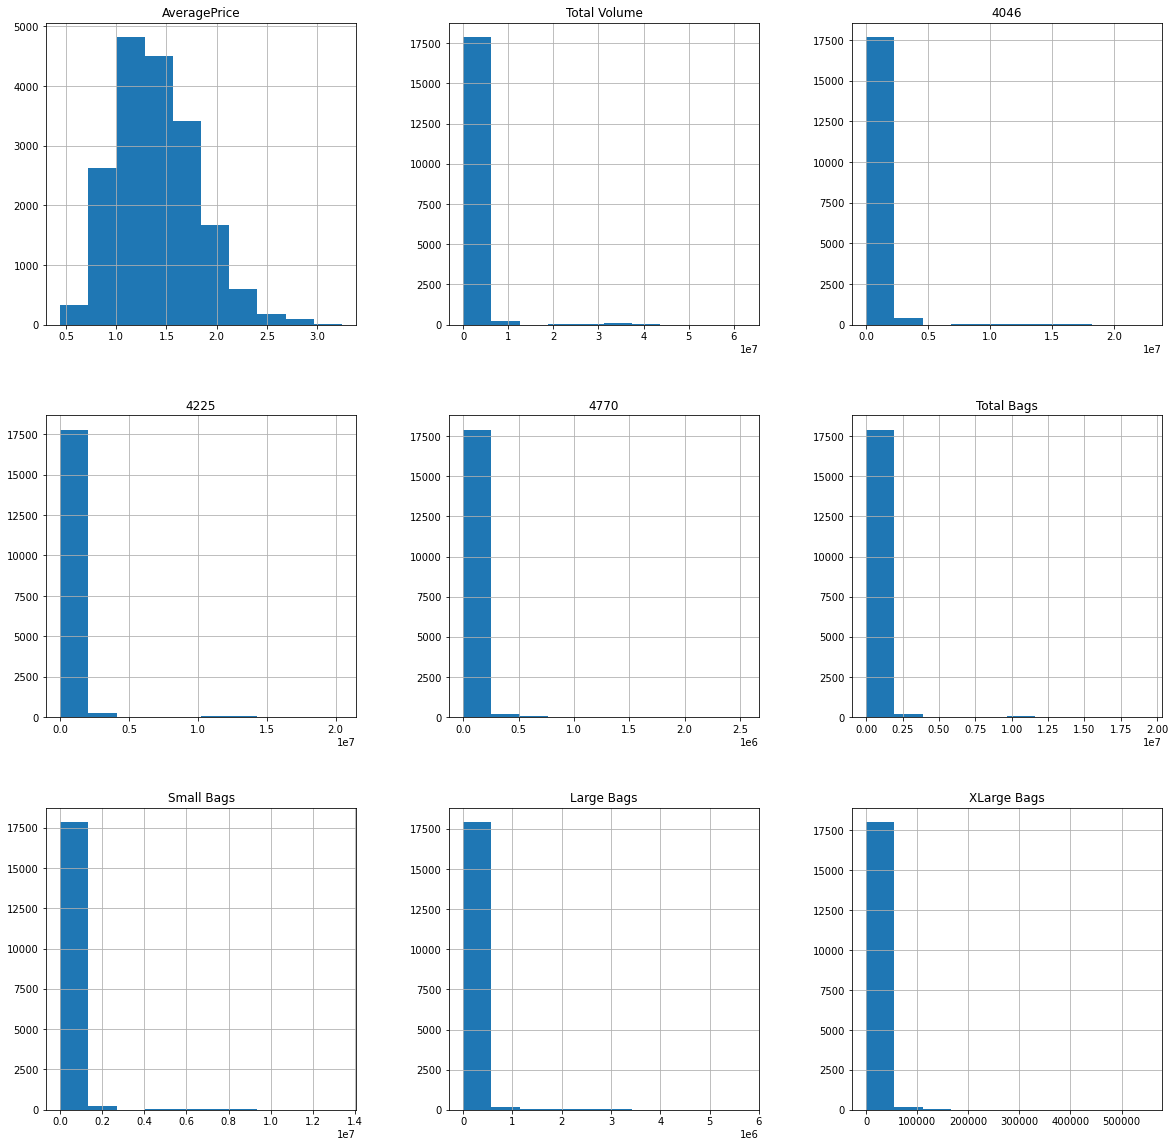

In [29]:
df1=df.drop(['year','Month'],axis=1)
df1.hist(figsize = (20,20))
plt.show()

We see that average price is a near normal distribution.

The remaining features are severely influenced by outliers, most of the values are located in the first bin of the histograms and the mean is way bigger than the median.

Rest of the data are not much varying in term of numbers, so they are almost left skewed data

## Distribution of organic & conventional avocado according to Average price

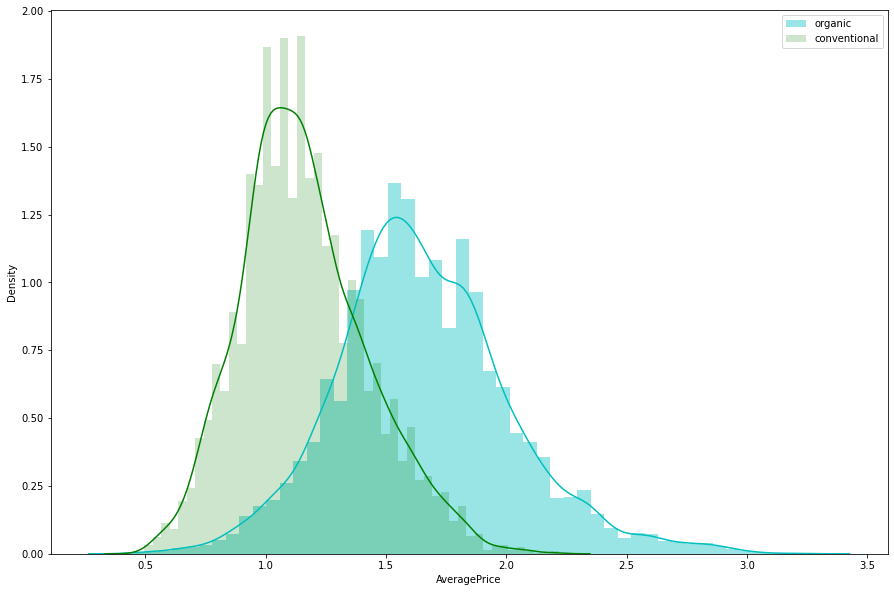

In [30]:
plt.figure(figsize=(15,10))
sns.distplot(df[df["type"] == "organic"]["AveragePrice"], color="c", label="organic")
sns.distplot(df[df["type"] == "conventional"]["AveragePrice"], color="g", label="conventional", 
             hist_kws={"alpha": 0.2})
plt.legend()

Here we can see that the distribution of Conventional avocado according to the average price is high as its cost is low with respect to organic

Lets take the outliers out of the quantities to see if we can find a more normal distribution

## Total volume of Avocado sold by City

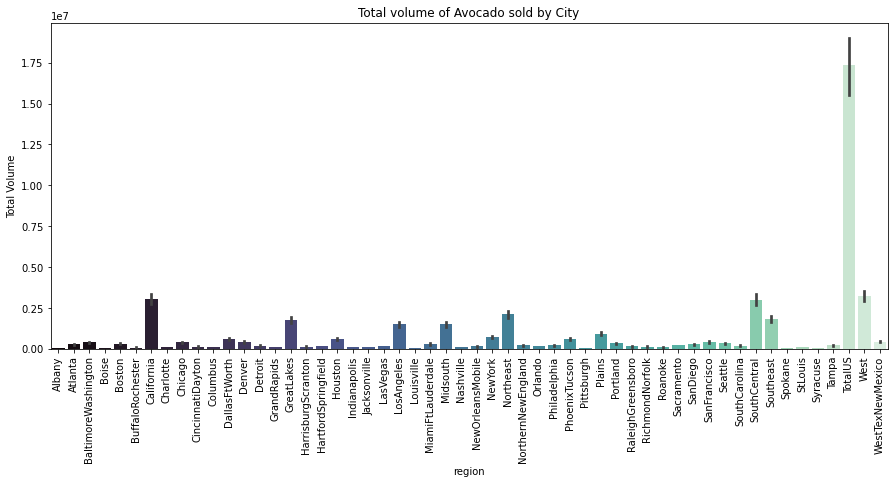

In [31]:
plt.figure(figsize=(15,6))
plt.title("Total volume of Avocado sold by City")
sns.barplot(x="region", y="Total Volume", data= df, palette="mako")
plt.xticks(rotation=90)
plt.show()

Here we can see that the total volume of avocado sold by a city is very high for TotalUS

## Total volume by year

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

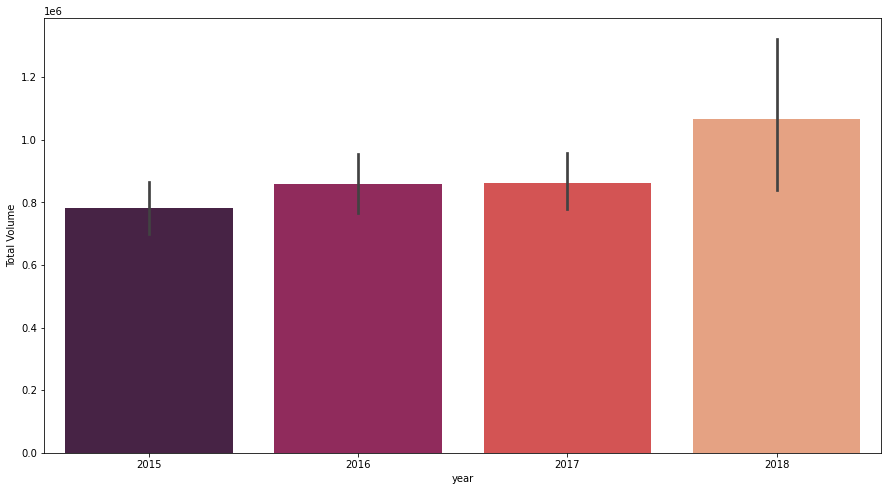

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(x="year", y="Total Volume", palette="rocket", data=df)

Here we can see that in 2018 the volume of avocados sold is very high and in year 2017 and 2018 is almost equal number

## Total volume by Month

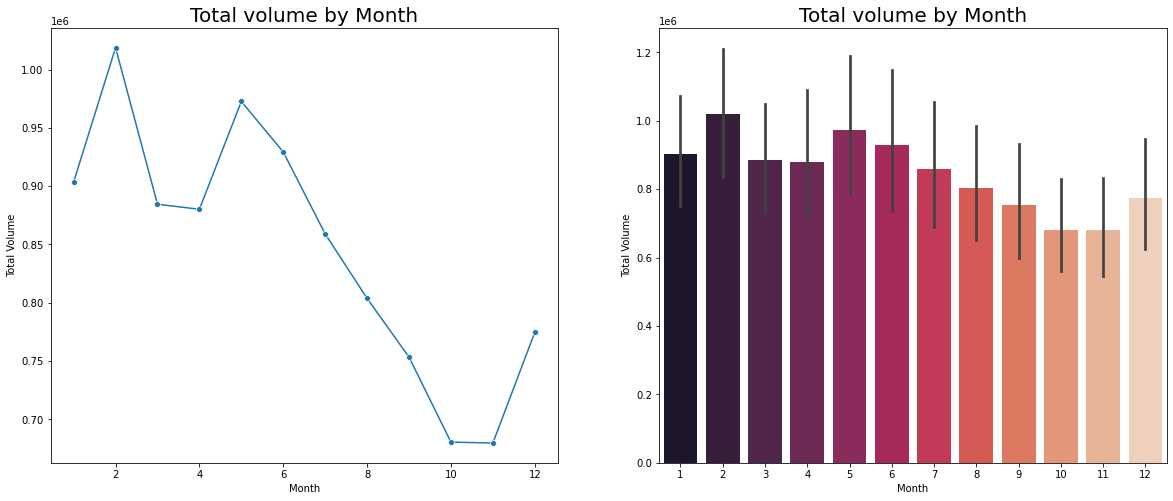

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.lineplot(x="Month", y="Total Volume", marker='o', ci=None, data=df,ax=ax[0])
ax[0].set_title('Total volume by Month', fontsize=20)

sns.barplot(x="Month", y="Total Volume", palette="rocket", data=df,ax=ax[1])
ax[1].set_title('Total volume by Month', fontsize=20)

plt.show()

from above two graphs we can see that the total sale or volume of the avocao is decreases in the third and second last month of the year, as a result it's average price increases

## Lets check the total volume of Avocado type in Years

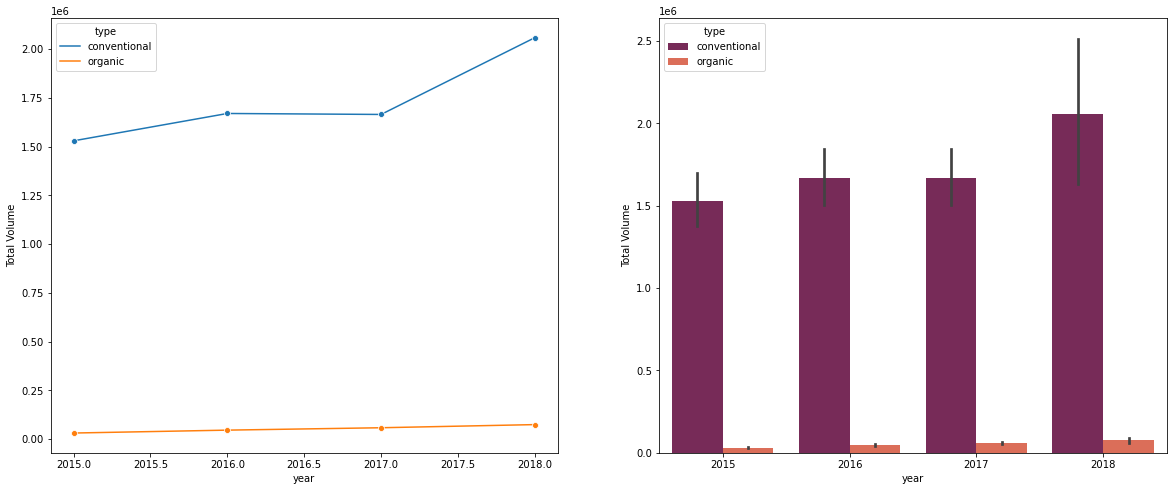

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.lineplot(x="year", y="Total Volume",hue="type", marker='o', ci=None, data=df,ax=ax[0])


sns.barplot(x="year", y="Total Volume",hue="type" ,palette="rocket", data=df,ax=ax[1])
plt.show()

From here we can see that the Total voumne of the conventional avocado increases year by year

## Lets check the total volume of Avocado type in Months

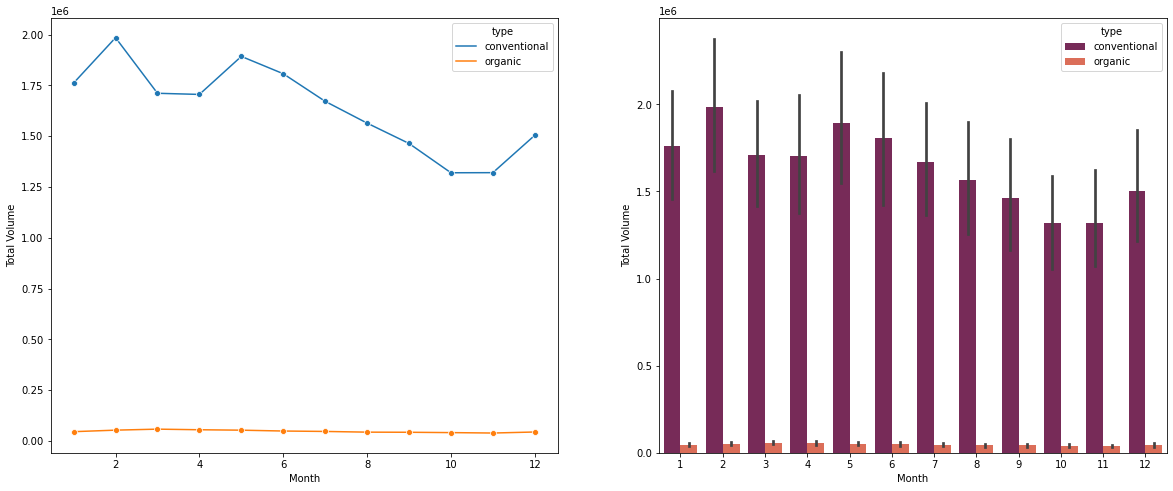

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.lineplot(x="Month", y="Total Volume",hue="type", marker='o', ci=None, data=df,ax=ax[0])


sns.barplot(x="Month", y="Total Volume",hue="type" ,palette="rocket", data=df,ax=ax[1])
plt.show()

Similarly here we can see that the conventional avocado total volume is less in the october and novmber month but its total volume is very higher than the Organic Avocado

## Average Price vs Total volume

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

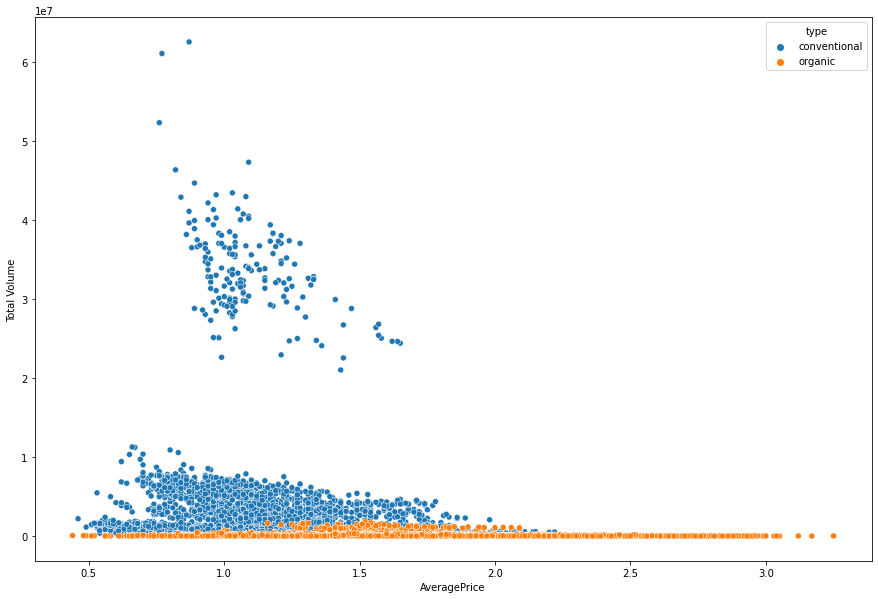

In [36]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="AveragePrice", y="Total Volume", hue="type", data=df)

here we can see that the Average price of Organic avocado is high than the Conventional Avocado but,

The total volume of Conventional Avocado is very higher than the Organic avocado.
That means Conventional avocado is always the first choice of the people as it's cost is low

## Feature Engineering for Model building

In [37]:
bigvolumes = df[df["Total Volume"] > 20_000_000]
bigvolumes.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
2652,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS,12
2653,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS,12
2654,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS,12


Here we see those records where total volume are then the 20000000

In [38]:
bigvolumes.region.unique()

array(['TotalUS'], dtype=object)

TotalUS have the very high Total volume of avocado in the entire region of all

In [39]:
bigvolumes.type.value_counts()

conventional    169
Name: type, dtype: int64

And the total volume that is sold is of Conventional avocado with the count of 169 records

In [40]:
bigvolumes.year.value_counts()

2017    53
2015    52
2016    52
2018    12
Name: year, dtype: int64

In Year 2017 total volume of avocado is highest

In [41]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [42]:
#Removing the unnecessary column which are not important
df.drop('Date',axis=1,inplace=True)

In [43]:
df_bags = df[["Total Bags", "Small Bags", "Large Bags", "XLarge Bags"]]
df_bags["total2"] = df_bags["Small Bags"] + df_bags["Large Bags"] + df_bags["XLarge Bags"]
df_bags["diff"] = df_bags["Total Bags"] - df_bags["total2"]
df_bags

,Total Bags,Small Bags,Large Bags,XLarge Bags,total2,diff
0,8696.87,8603.62,93.25,0.0,8696.87,0.000000e+00
1,9505.56,9408.07,97.49,0.0,9505.56,0.000000e+00
2,8145.35,8042.21,103.14,0.0,8145.35,0.000000e+00
3,5811.16,5677.40,133.76,0.0,5811.16,0.000000e+00
4,6183.95,5986.26,197.69,0.0,6183.95,0.000000e+00
...,...,...,...,...,...,...
18244,13498.67,13066.82,431.85,0.0,13498.67,0.000000e+00
18245,9264.84,8940.04,324.80,0.0,9264.84,0.000000e+00
18246,9394.11,9351.80,42.31,0.0,9394.11,1.818989e-12
18247,10969.54,10919.54,50.00,0.0,10969.54,0.000000e+00


Hence we can remove the Total Bags columns as it is the sum of small , large and XLarge bags

In [44]:
df = df.drop(columns = ["Total Bags"])

In [45]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
dtype: float64

In [46]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region', 'Month'],
      dtype='object')

In [47]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution

skew=['Total Volume', '4046', '4225', '4770', 'Small Bags',
       'Large Bags', 'XLarge Bags']

for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [48]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
Month           0.106617
dtype: float64

Almost from every columns skewness value is near to zero

In [49]:
df['XLarge Bags']=np.sqrt(df['XLarge Bags'])

In [50]:
df['XLarge Bags'].skew()

0.8655290494802615

## Removing outliers

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Small Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
XLarge Bags      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
year            AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Month           AxesSubplot(0.766379,0.518913;0.133621x0.16413)
dtype: object

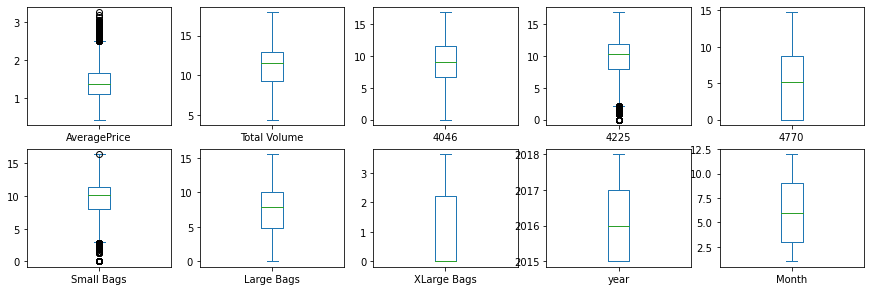

In [51]:
#Plotting the boxplot of each coumn to check the outliers
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

From above graph we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.

## label encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [53]:
varib=['type','region']
for i in varib:
    df[i]=label.fit_transform(df[i])

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [55]:
print(df.shape)
print(df_new.shape)
df=df_new
print("Shape after removing ouliers",df.shape)

(18249, 12)
(17858, 12)
Shape after removing ouliers (17858, 12)


After, removing the outlier’s final there are 17858 and 17858 column presents in the data set.

In [56]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,11.070344,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,0,2015,0,12
1,1.35,10.912867,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,0,2015,0,12
2,0.93,11.680313,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0,2015,0,12
3,1.08,11.277116,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,0,2015,0,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,0,2015,0,11


## Splitting data and Standard Scaling

In [57]:
df_x=df.drop(['AveragePrice'],axis=1)
y=df[['AveragePrice']]

In [58]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(df_x)

x=pd.DataFrame(X,columns=df_x.columns)
x.head()

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.132543,-0.627878,0.357454,-0.300992,-0.320355,-0.682908,-0.702013,-0.978175,-1.228337,-1.691819,1.648818
1,-0.201614,-0.755926,0.286358,-0.255625,-0.283004,-0.671439,-0.702013,-0.978175,-1.228337,-1.691819,1.648818
2,0.134993,-0.707024,0.606167,-0.063602,-0.348552,-0.656901,-0.702013,-0.978175,-1.228337,-1.691819,1.648818
3,-0.041852,-0.601705,0.457234,-0.203690,-0.494053,-0.589722,-0.702013,-0.978175,-1.228337,-1.691819,1.648818
4,-0.233409,-0.656572,0.279887,-0.193419,-0.471918,-0.488532,-0.702013,-0.978175,-1.228337,-1.691819,1.366468


In [59]:
x.shape

(17858, 11)

In [60]:
y.shape

(17858, 1)

## Prediction with Average Price:

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [64]:
model=[LinearRegression(),DecisionTreeRegressor(),
       KNeighborsRegressor(),RandomForestRegressor(),
       AdaBoostRegressor(),Lasso(),SVR()]

In [84]:
max_r2_score=0

In [86]:
LR=LinearRegression()
sv=SVR()
rf=RandomForestRegressor(n_estimators=100)
knn=KNeighborsRegressor()
dtr=DecisionTreeRegressor()
ls=Lasso(alpha=0.01)

In [88]:
model=[LR,sv,rf,knn,dtr,ls]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("The Mean absolute error value of ",m ,"is. ")
    print("Mean absolute error: " , mean_absolute_error(y_test,predm))
    print()
    print("The Mean squared error value of ",m ,"is. ")
    print("Residual sum of squares (MSE): " , mean_squared_error(y_test,predm))
    print()
    print("The r2_score value of ",m ,"is. ")
    print("R2-score of : " , r2_score(y_test,predm))
    print()
    print("Now check with Cross validation\n")
    
    score=cross_val_score(m,X,y,cv=5)
    print("The score after cross_validation : ",score)
    print("The Mean score after cross_validation : ",score.mean())
    print('\n')

The Mean absolute error value of  LinearRegression() is. 
Mean absolute error:  0.20670896467827815

The Mean squared error value of  LinearRegression() is. 
Residual sum of squares (MSE):  0.06842515728516992

The r2_score value of  LinearRegression() is. 
R2-score of :  0.5507554717056607

Now check with Cross validation

The score after cross_validation :  [-0.18466624  0.23772513  0.50328575  0.22767138  0.28027096]
The Mean score after cross_validation :  0.212857395961207


The Mean absolute error value of  SVR() is. 
Mean absolute error:  0.13377203697953646

The Mean squared error value of  SVR() is. 
Residual sum of squares (MSE):  0.03222641090779095

The r2_score value of  SVR() is. 
R2-score of :  0.7884178956790228

Now check with Cross validation

The score after cross_validation :  [-0.67778016  0.500452    0.31536935  0.26415885  0.10848809]
The Mean score after cross_validation :  0.10213762622945392


The Mean absolute error value of  RandomForestRegressor() is. 
Mean

Observation:
Minimum difference in R2score and Cross validation score is for RandomForestRegressor. So this is our best model.

AS R2 score is : 0.88 and Cross validation score is : 0.22

In [89]:
max_r2_score = 0.8892760731844287
final_model = RandomForestRegressor()

In [90]:
print("Max R2 score correspond to random size ",final_state,"is",max_r2_score,"and model is",final_model)

Max R2 score correspond to random size  47 is 0.8892760731844287 and model is RandomForestRegressor()


## Hyperparameter Tuning

In [93]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
model = RandomForestRegressor()
rand_search = RandomizedSearchCV(estimator=model, param_distributions=random_grid,n_jobs=-1)

In [96]:
Rfr = RandomForestRegressor(bootstrap=False, max_depth=90, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200)
Rfr.fit(x_train,y_train)
pred=Rfr.predict(x_test)
r2_sc= r2_score(y_test,pred)
print("R2 score :",r2_sc*100)

R2 score : 88.89122383696069


In [97]:
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred))
print("Mean Squared Error: ",mean_squared_error(y_test,pred))
print(" Root Mean Absolute Error: ",np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.09186710197682711
Mean Squared Error:  0.01691995579974409
 Root Mean Absolute Error:  0.30309586268510347


Text(0, 0.5, 'Predicted_Y')

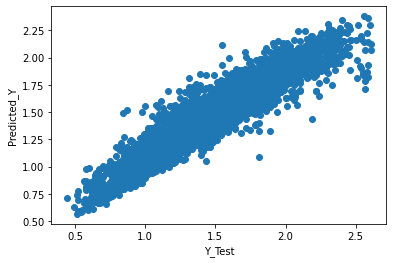

In [98]:
#Checking the diff. between actual and predicted value using graph
plt.scatter(x=y_test,y=pred)
plt.xlabel("Y_Test")
plt.ylabel("Predicted_Y")

## Saving the model

In [99]:
#saving the model
model=joblib.dump(Rfr,'AvocadoRFR.obj')

In [100]:
loaded_model= joblib.load('AvocadoRFR.obj')
result=loaded_model.score(x_test,y_test)
print(result)

0.888912238369607


In [101]:
conclusion= pd.DataFrame([Rfr.predict(x_test)[:10]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9
Predicted,0.846364,1.052253,1.642625,1.356553,1.161656,1.357882,1.70994,1.050302,1.139237,1.69027
Original,0.846364,1.052253,1.642625,1.356553,1.161656,1.357882,1.70994,1.050302,1.139237,1.69027
